In [5]:
import pandas as pd

In [6]:
import os

In [7]:
os.chdir('..')

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
import pandas as pd
import numpy as np
import requests


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [10]:
url = "https://en.wikivoyage.org/w/api.php?format=json&action=query&prop=extracts&exintro&explaintext&redirects=1&titles=Pisa"

f = requests.get(url)
print(f.text)

{"batchcomplete":"","query":{"pages":{"27718":{"pageid":27718,"ns":0,"title":"Pisa","extract":"Pisa is a city in Tuscany, Italy, best known for its world-famous leaning tower. But the tower isn't the only thing to see \u2013 there are other architectural and artistic marvels in this beautiful city. The half-hour walk from the Campo dei Miracoli to the train station runs through a pedestrian street with many interesting sights, shops, and restaurants. The best way to visit Pisa is walking the streets, as the city centre is small and cosy, and enjoying the sight and the atmosphere."}}}}


In [49]:
data = ['Pisa is a city in Tuscany, Italy, best known for its world-famous leaning tower with beautiful architecture and artistic views.'
            'But the tower isnt the only thing to see – there are other architecture and artistic marvels in this beautiful city.',
            'The half-hour walk from the Campo dei Miracoli to the train station runs through a pedestrian street with many interesting sights, shops, and restaurants.',
            'The best way to visit Pisa is walking the streets, as the city centre is small and cosy, and enjoying the sight and the atmosphere.']

[('city', 3.0), ('architecture', 2.0), ('artistic', 2.0), ('beautiful', 2.0), ('best', 2.0)]


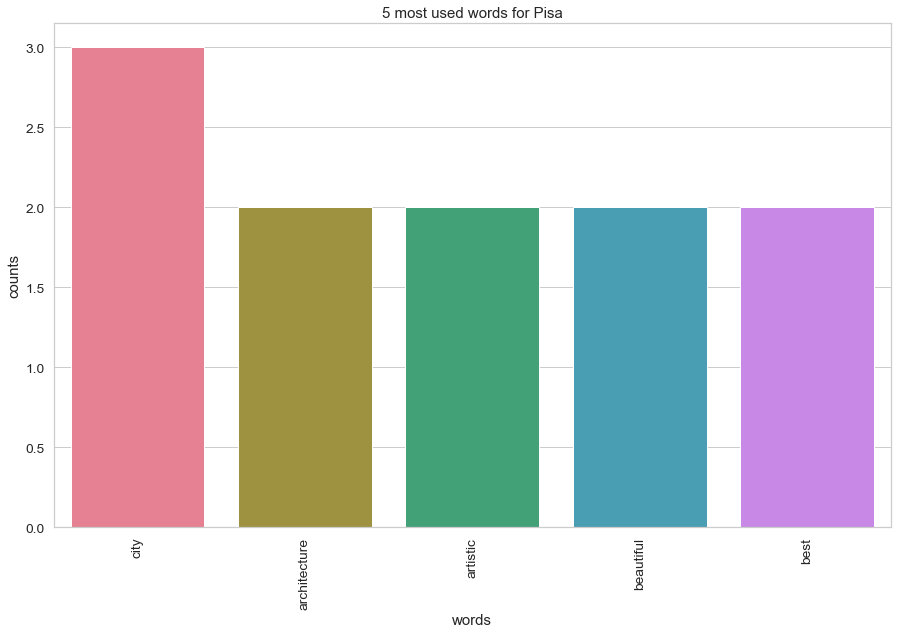

In [160]:
def plot_5_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    print (count_dict)
    x_pos = np.arange(len(words))
    
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='5 most used words for Pisa')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

    
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(data)

plot_5_most_common_words(count_data, count_vectorizer)

In [52]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [53]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [106]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    
    for topic_idx, topic in enumerate(model.components_):
        
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [161]:
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 5


# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [162]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
pisa best city streets sight

Topic #1:
city architecture artistic beautiful tower

Topic #2:
miracoli street interesting dei pedestrian

Topic #3:
pisa best streets sight way

Topic #4:
pisa best city streets sight


In [159]:
moods = {"beach", "artistic", "mountain", "romantic", "lakes", "historic", "architecture"}

words = count_vectorizer.get_feature_names()
tags = []
for topic_idx, topic in enumerate(lda.components_):
    for s in [words[i]
                        for i in topic.argsort()[:-10 - 1:-1]]:
        for m in moods:
            if(m==s):
                tags.append(m)
                
print("Pisa is tagged with: ", ", ".join(tags))

Pisa is tagged with:  architecture, artistic
